In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

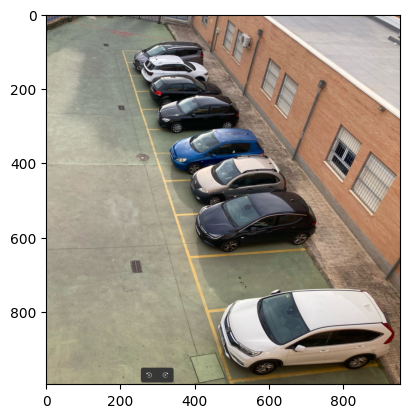

In [4]:
parking = cv2.imread('parking.png')
parking_g = cv2.cvtColor(parking, cv2.COLOR_BGR2RGB)

plt.imshow(parking_g)

---

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-22 Python-3.11.11 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 124MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [8]:
image = Image.open('parking.png')

In [9]:
results = model(image)
detections = results.pandas().xyxy[0]

#Cargar la imagen con OpenCV
img_cv = cv2.imread('parking.png')

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


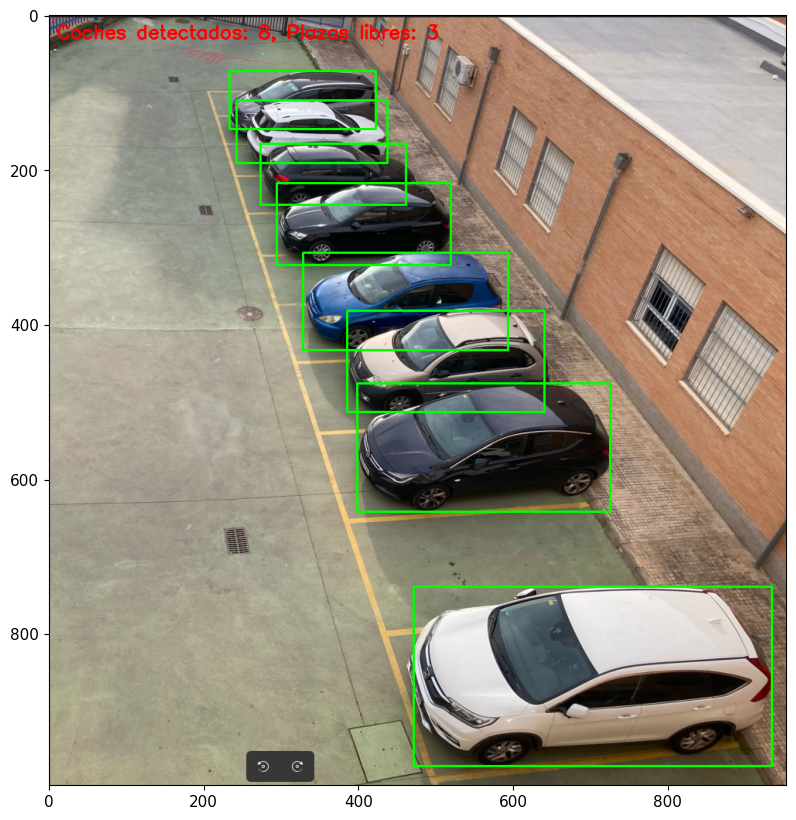

In [11]:
# Obtener las coordenadas de los coches detectados
car_coordinates = []
for index, row in detections.iterrows():
  if row['name'] == 'car':
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    car_coordinates.append((x1, y1, x2, y2))


# Dibujar un cuadro alrededor de cada coche detectado
num_cars = len(car_coordinates)
for x1, y1, x2, y2 in car_coordinates:
  cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Calcular las plazas libres
total_spots = 11
free_spots = total_spots - num_cars


# Mostrar el número de coches detectados y las plazas libres en la imagen
text = f"Coches detectados: {num_cars}, Plazas libres: {free_spots}"
cv2.putText(img_cv, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)


# Mostrar la imagen con los cuadros y el texto
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.show()